<a href="https://colab.research.google.com/github/karemanh/Zoo-Animal-Classification/blob/master/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Confusion Matrix

In [7]:
#https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('cool') ##https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## import data

In [8]:
dataset = pd.read_csv('https://raw.githubusercontent.com/karemanh/zoo/main/zoo.1.csv')

In [ ]:
dataset.head(101)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## histogram data

array([[<Axes: title={'center': 'hair'}>,
        <Axes: title={'center': 'feathers'}>,
        <Axes: title={'center': 'eggs'}>,
        <Axes: title={'center': 'milk'}>],
       [<Axes: title={'center': 'airborne'}>,
        <Axes: title={'center': 'aquatic'}>,
        <Axes: title={'center': 'predator'}>,
        <Axes: title={'center': 'toothed'}>],
       [<Axes: title={'center': 'backbone'}>,
        <Axes: title={'center': 'breathes'}>,
        <Axes: title={'center': 'venomous'}>,
        <Axes: title={'center': 'fins'}>],
       [<Axes: title={'center': 'legs'}>,
        <Axes: title={'center': 'tail'}>,
        <Axes: title={'center': 'domestic'}>,
        <Axes: title={'center': 'catsize'}>],
       [<Axes: title={'center': 'class_type'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

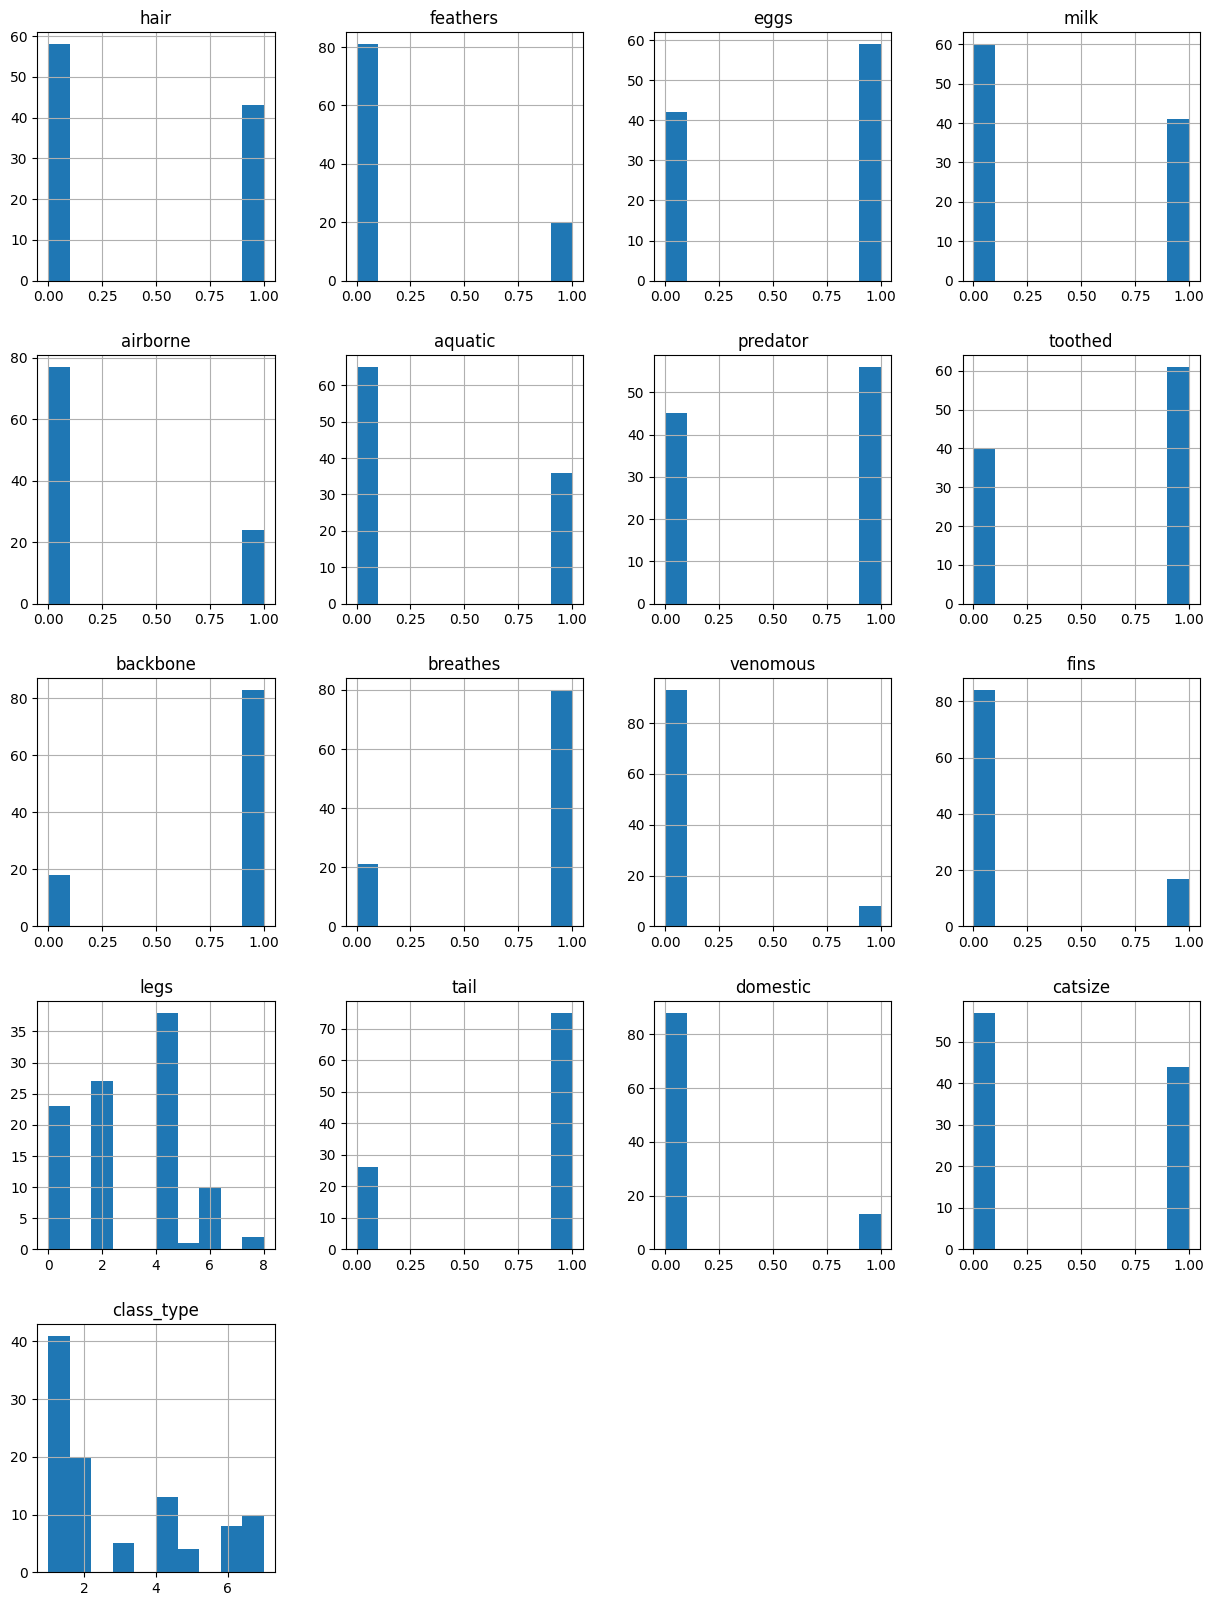

In [9]:
rcParams['figure.figsize'] = 15,20
dataset.hist()

In [10]:
dataset['class_type'].unique()


array([1, 4, 2, 7, 6, 5, 3])

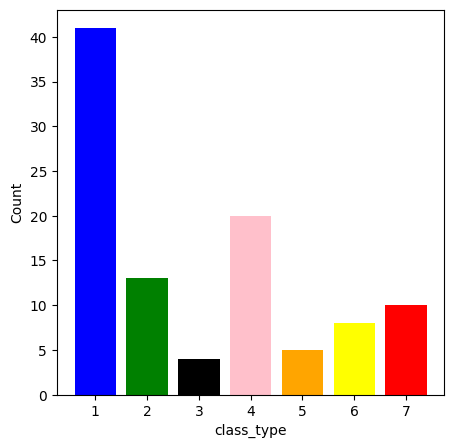

In [12]:
plt.bar(dataset['class_type'].unique(), dataset['class_type'].value_counts(), color = ['blue', 'pink','green','red','yellow','orange','black','brown'])
plt.xticks([1, 2,3,4,5,6,7])
plt.xlabel('class_type')
plt.ylabel('Count')
rcParams['figure.figsize'] = 2,2
#plt.title('Count of each class_type')

## Data Preprocessing



In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# This is the preprocessing
dataset_Dum = pd.get_dummies(dataset, columns=['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
                                               'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize'], drop_first=True)

dataset_Dum.head(101)
dataset_Dum.head(101)

,class_type,hair_1,feathers_1,eggs_1,milk_1,airborne_1,aquatic_1,predator_1,toothed_1,backbone_1,...,venomous_1,fins_1,legs_2,legs_4,legs_5,legs_6,legs_8,tail_1,domestic_1,catsize_1
0,1,1,0,0,1,0,0,1,1,1,...,0,0,0,1,0,0,0,0,0,1
1,1,1,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
2,4,0,0,1,0,0,1,1,1,1,...,0,1,0,0,0,0,0,1,0,0
3,1,1,0,0,1,0,0,1,1,1,...,0,0,0,1,0,0,0,0,0,1
4,1,1,0,0,1,0,0,1,1,1,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,1,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,1
97,6,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
98,1,1,0,0,1,0,0,1,1,1,...,0,0,0,1,0,0,0,1,0,1
99,7,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Machine Learning

In [14]:
y = dataset_Dum['class_type']
X = dataset_Dum.drop(['class_type'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

## Standardizing the Data

In [17]:
from sklearn.preprocessing import StandardScaler
stander = StandardScaler()
stander.fit(X_train) #calculate the paramters for scaling

X_train = stander.transform(X_train)
X_test = stander.transform(X_test)
X_train

array([[ 1.13898959, -0.51832106, -1.16666667, ...,  0.59093684,
        -0.40544243,  1.08604198],
       [-0.87797115, -0.51832106,  0.85714286, ..., -1.69222822,
        -0.40544243, -0.92077472],
       [-0.87797115,  1.92930615,  0.85714286, ...,  0.59093684,
        -0.40544243, -0.92077472],
       ...,
       [ 1.13898959, -0.51832106, -1.16666667, ...,  0.59093684,
        -0.40544243,  1.08604198],
       [ 1.13898959, -0.51832106, -1.16666667, ...,  0.59093684,
        -0.40544243,  1.08604198],
       [ 1.13898959, -0.51832106, -1.16666667, ...,  0.59093684,
        -0.40544243,  1.08604198]])



```
### Identify the Grid search and Train the model
```



In [40]:
from sklearn.neural_network import MLPClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
Hyper_paramters={'batch_size':["auto",100],'hidden_layer_sizes':[(5,5,5), (5), (6), (4)],
                 'learning_rate_init':[0.001,0.005, 0.01,0.2,0.3,0.1,0.5,0.4,0.004,0.008],'max_iter':[500,600]}

NN_Gridsearch_paramters=GridSearchCV(MLPClassifier(),Hyper_paramters,scoring='roc_auc',n_jobs=-1,
                                     cv=5,return_train_score=False,verbose=0)
#NN_Gridsearch_paramters=GridSearchCV(MLPClassifier(early_stopping=True),Hyper_paramters,scoring='roc_auc',n_jobs=-1,cv=5,verbose=0)

NN_crossvalidation=NN_Gridsearch_paramters.fit(X_train,y_train)

#Tree_crossvalidation=Tree_Gridsearch_paramters.fit(X_train,Ytrain.values.ravel())

print ("The best paramter combination is ")

print(NN_crossvalidation.best_params_)  #gets best estimator

Final_Model=NN_crossvalidation.best_estimator_ #gets best estimator

print("The best AUC score was ")

print(NN_crossvalidation.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


The best paramter combination is 
{'batch_size': 'auto', 'hidden_layer_sizes': (5, 5, 5), 'learning_rate_init': 0.001, 'max_iter': 500}
The best AUC score was 
nan


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:
X_test_scaled = StandardScaler().fit_transform(X_test)
Final_Model = MLPClassifier(hidden_layer_sizes=(3, 3, 3), activation='relu', solver='adam', max_iter=300)
Final_Model.fit(X_test_scaled, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(3, 3, 3), max_iter=300)

In [39]:
y_pred = Final_Model.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
print(classification_report(y_test, y_pred, target_names=["1","2","3","4","5","6","7"]))

#Calculate sensitivity and specificity

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

[[6 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [1 0 0 3 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 2]]
              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         0
           4       1.00      0.75      0.86         4
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.88        16
   macro avg       0.69      0.68      0.68        16
weighted avg       0.88      0.88      0.87        16

Accuracy :  0.5
Sensitivity :  1.0
Specificity :  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.